<a href="https://colab.research.google.com/github/ManupatiEshwar/Data-Mining/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
np.random.seed(42)
data = np.random.normal(1, 100, 100)   #normal distribution
outliers = np.random.uniform(5,10,5)    #Artifical outlies

In [ ]:
print(data)

[  50.6714153   -12.82643012   65.76885381  153.30298564  -22.41533747
  -22.41369569  158.92128155   77.74347292  -45.94743859   55.25600436
  -45.34176928  -45.57297536   25.19622716 -190.32802447 -171.49178325
  -55.22875292 -100.28311203   32.42473326  -89.80240755 -140.23037013
  147.56487689  -21.57763005    7.75282047 -141.47481862  -53.43827245
   12.09225897 -114.09935774   38.56980183  -59.06386899  -28.16937498
  -59.17066122  186.22781845   -0.34972247 -104.7710929    83.25449121
 -121.084365     21.8863595  -194.96701239 -131.81860489   20.68612359
   74.846658     18.13682812  -10.56482824  -29.11036956 -146.85219904
  -70.98442084  -45.0638771   106.71222262   35.36182896 -175.30401554
   33.40839694  -37.50822804  -66.69220003   62.16762888  104.09995225
   94.12801191  -82.92175232  -29.92123759   34.12634314   98.55451271
  -46.91742378  -17.56589767 -109.6334974  -118.62066241   82.25258224
  136.62400286   -6.20101216  101.35328979   37.1636025   -63.51197546
   37.

In [ ]:
data.max()

186.22781845089378

In [ ]:
data.min()

-260.9745104089744

In [ ]:
outliers

array([7.08705502, 6.11053905, 5.59932684, 6.68807586, 9.71454852])

In [ ]:
outliers.max()

9.714548519562596

In [ ]:
outliers.min()

5.599326836668414

In [ ]:
data_with_outliers=np.concatenate((data,outliers))

In [ ]:
df=pd.DataFrame(data_with_outliers,columns=['Value'])

In [ ]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [ ]:
outliers_iqr = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]

In [ ]:
z_scores = stats.zscore(df['Value'])
outliers_zscore = df[np.abs(z_scores) > 10]

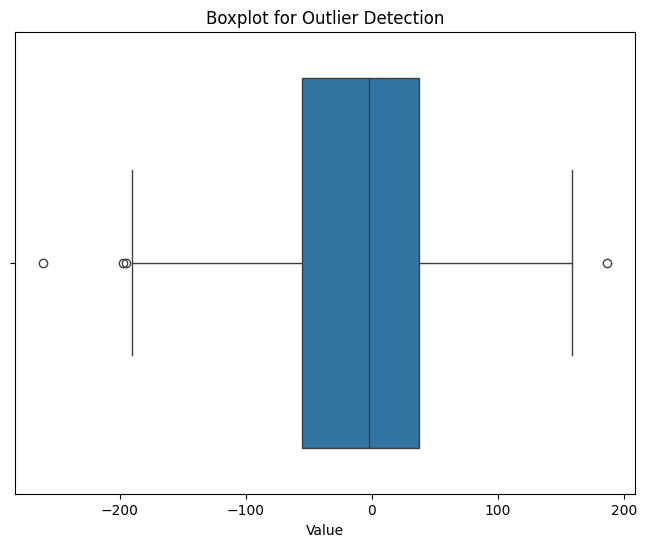

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Value'])
plt.title("Boxplot for Outlier Detection")
plt.show()

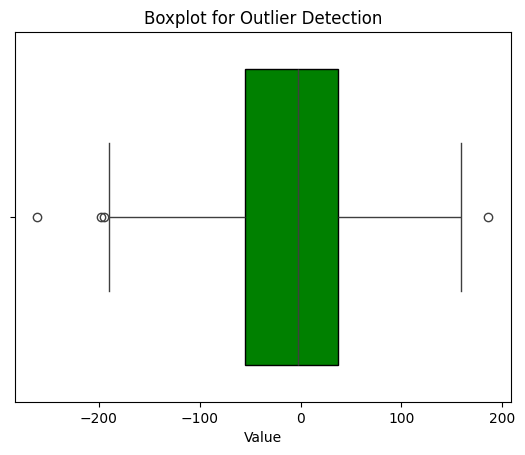

In [ ]:
sns.boxplot(x=df['Value'], boxprops=dict(facecolor='green', edgecolor='black'))
plt.title("Boxplot for Outlier Detection")
plt.show()

In [ ]:
df_capped = df.copy()
df_capped['Value'] = np.clip(df_capped['Value'], lower_bound, upper_bound)

In [ ]:
df_removed = df.copy()
df_removed = df_removed[(df_removed['Value'] >= lower_bound) &
(df_removed['Value'] <= upper_bound)]

In [ ]:
df_imputed = df.copy()
median_value = df['Value'].median()
df_imputed['Value'] = np.where((df_imputed['Value'] < lower_bound) |
(df_imputed['Value'] > upper_bound), median_value, df_imputed['Value'])

In [ ]:
df_imputed

,Value
0,50.671415
1,-12.826430
2,65.768854
3,153.302986
4,-22.415337
...,...
100,7.087055
101,6.110539
102,5.599327
103,6.688076


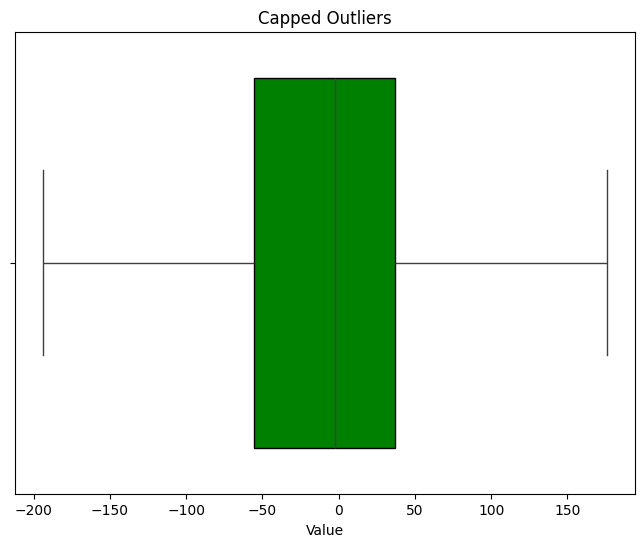

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_capped['Value'], boxprops=dict(facecolor='green', edgecolor='black'))
plt.title("Capped Outliers")
plt.show()